# Plotting Waterbody Data

## Background
In this notebook, we will look at the wet percentage data for a given waterbody. Plotting a waterbody's historical observed wet percentage data gives us better insight into the presence of seasonal patterns, trends or anomalies. 

This is done through using past observations, grouping them by months into percentiles and plotting the most recent observations. Percentiles are a statistical measure used to understand the distribution of data points (observations) within a dataset.

## Description
This notebook demonstrates how to load and plot a waterbody's wet percentage timeseries data from the [DE Africa Waterbodies service](https://docs.digitalearthafrica.org/en/latest/data_specs/Waterbodies_specs.html). 

Topics covered include:

1. Getting a list of available polygons in a given area
2. Select a single polygon
3. Plotting the monthly wet percentage percentiles of the polygon

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the “Load packages” cell.

### Load packages
Import Python packages that are used for the analysis.

In [21]:
import matplotlib.pyplot as plt

from deafrica_tools.plotting import display_map
from deafrica_tools.waterbodies import (
    get_waterbodies,
    get_waterbody,
    get_time_series,
)

### Analysis parameters

This section defines the analysis parameters, including:

* `lat`, `lon`, `buffer`: center lat/lon and analysis window size for the area of interest (in degrees)

In [22]:
# set the central latitude and longitude30.64559°S, 25.64346°E
lat = -30.64559
lon = 25.64346
# set the buffer to load around the central coordinates
buffer = 0.1
# compute the bounding box coordinates
xlim = (lon - buffer, lon + buffer)
ylim = (lat + buffer, lat - buffer)
# create a bounding box from study area coordinates
bbox = (xlim[0], ylim[1], xlim[1], ylim[0])
# select all water bodies located within the bounding box
polygons = get_waterbodies(bbox, crs="EPSG:4326")

### Displaying the polygons
We can plot and explore the water bodies within the bounding box. By hovering over the waterbody you want to select, this will show a pop-up box containing the unique identifier (UID), called a geohash, which we will need for analysis. 

In [23]:
# explore the waterbody polygons located within the bounding box
polygons.explore()

### List waterbody polygons in an area
Alternatively, can return a list of waterbody polygons inside a bounding box of coordinates and select the UID we will use for analysis.

In [24]:
# return GeoDataFrame with selected waterbodies
polygons

,id,area_m2,length_m,UID,WB_ID,perim_m,timeseries,geometry
0,DEAfrica_Waterbodies.118001,2.250000e+04,210.000000,kdd1mbzuu6,118001,780.0000,https://deafrica-services.s3.af-south-1.amazon...,"MULTIPOLYGON (((25.57607 -30.71194, 25.57669 -..."
1,DEAfrica_Waterbodies.118002,1.260000e+04,120.000000,kdd1mypdkf,118002,480.0000,https://deafrica-services.s3.af-south-1.amazon...,"MULTIPOLYGON (((25.57514 -30.68387, 25.57607 -..."
2,DEAfrica_Waterbodies.118004,2.250000e+04,210.000000,kdd1pem762,118004,720.0000,https://deafrica-services.s3.af-south-1.amazon...,"MULTIPOLYGON (((25.64852 -30.74274, 25.65038 -..."
3,DEAfrica_Waterbodies.118005,5.490000e+04,423.610852,kdd1pkzc5v,118005,1260.0000,https://deafrica-services.s3.af-south-1.amazon...,"MULTIPOLYGON (((25.64199 -30.73456, 25.64323 -..."
4,DEAfrica_Waterbodies.118006,2.430000e+04,210.000000,kdd1q1kvcd,118006,720.0000,https://deafrica-services.s3.af-south-1.amazon...,"MULTIPOLYGON (((25.58198 -30.70921, 25.58322 -..."
5,DEAfrica_Waterbodies.118008,1.260000e+04,179.999512,kdd1w9rdsk,118008,540.0000,https://deafrica-services.s3.af-south-1.amazon...,"MULTIPOLYGON (((25.60872 -30.66561, 25.60903 -..."
6,DEAfrica_Waterbodies.118009,2.790000e+04,210.000000,kdd1ztybd8,118009,720.0000,https://deafrica-services.s3.af-south-1.amazon...,"MULTIPOLYGON (((25.65069 -30.59725, 25.65163 -..."
7,DEAfrica_Waterbodies.118063,5.400000e+04,270.000000,kdd30gx49b,118063,1080.0000,https://deafrica-services.s3.af-south-1.amazon...,"MULTIPOLYGON (((25.70728 -30.74083, 25.70790 -..."
8,DEAfrica_Waterbodies.118064,3.510000e+04,317.999609,kdd30uyrtm,118064,900.0000,https://deafrica-services.s3.af-south-1.amazon...,"MULTIPOLYGON (((25.70448 -30.73347, 25.70635 -..."
9,DEAfrica_Waterbodies.118065,2.070000e+04,209.999512,kdd3150w48,118065,660.0000,https://deafrica-services.s3.af-south-1.amazon...,"MULTIPOLYGON (((25.70821 -30.74329, 25.70884 -..."


### Selecting a waterbody by Geohash
After defining a waterbody's geohash, we use the `get_waterbody()` function to retrieve the waterbody data.

In [25]:
# select waterbody by geohash
selected_waterbody_geohash = "kwdbbds0cj"
selected_waterbody = get_waterbody(selected_waterbody_geohash)

### Get timeseries of selected waterbody
We then use the `get_time_series()` function to extract the timeseries data for the waterbody, and then select the percentage wet ('pc_wet') attribute from the timeseries. 

In [26]:
# get timeseries of selected waterbody
selected_waterbody_timeseries = get_time_series(waterbody=selected_waterbody.iloc[0])
# select wet percentage from timeseries csv
wet_percentage_timeseries = selected_waterbody_timeseries["pc_wet"]

### Plotting a waterbody's percentage wet timeseries data
This plotting function provides three different plotting options. Each one of these options, raw, median and rolling median, represents a different way of processing a waterbody's timeseries data before visualisation. As each data processing option is different, this affects how trends, patterns and anomalies are visualised and interpreted.

* **Raw values ('raw_values')**
This option uses raw time series data without applying any aggregation or smoothing. 

* **Median ('median')**
This option resamples the timeseries data and calculates the median value for each month.

* **Rolling Median ('rolling_median')**
This option uses a rolling median over a specified window (4 months), calculates the mean of these values and smooths the data by reducing large fluctuations in the data. 

In [27]:
def plot_timeseries(timeseries, option="median"):
    # select wet percentage from timeseries csv
    wet_percentage_timeseries = selected_waterbody_timeseries["pc_wet"]

    if option == "raw_values":
        # converts Series to dataFrame using .to_frame
        prepared_timeseries = wet_percentage_timeseries

    elif option == "rolling_median":
        # calc. 4-month rolling av. of monthly median "pc_wet" values
        window = 4
        # rolling mean can be calculated with a min. of 1 valid observation within the windom
        prepared_timeseries = (
            wet_percentage_timeseries.resample("M")
            .median()
            .rolling(window=window, min_periods=1)
            .mean()
        )

    elif option == "median":
        # resample the "pc_wet" data to monthly averages using median values
        prepared_timeseries = wet_percentage_timeseries.resample("M").median()

    else:
        raise ValueError(
            "Invalid option. Select either 'raw_values', 'median', or 'rolling_median'."
        )
    # converts Series to dataFrame using .to_frame
    timeseries_df = prepared_timeseries.to_frame(name="pc_wet")

    # takes the year/month from the indexed date column into two new columns
    timeseries_df["year"] = timeseries_df.index.year
    timeseries_df["month"] = timeseries_df.index.month

    # groups row of the dataframe by 'month'
    group_by_month = timeseries_df.groupby("month")
    # selects 'pc_wet' column from groups created, quantiles calc
    percentiles = (
        group_by_month["pc_wet"].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).unstack()
    )
    new_columns = [
        f"{int(quantile * 100)}th percentile" for quantile in percentiles.columns
    ]
    # assigns the new list of column names created to percentiles DataFrame
    percentiles.columns = new_columns
    percentiles["month"] = percentiles.index

    # define colors
    colors = ["#7fc97f", "#beaed4", "#fdc086", "#ffff99", "#386cb0", "#f0027f"]
    month_names = [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ]
    legend_rename = {"0th percentile": "Minimum", "100th percentile": "Maximum"}

    plt.figure(figsize=(10, 6))
    percentile_columns = [col for col in percentiles.columns if "percentile" in col]

    for i, percentile in enumerate(percentile_columns):
        plt.plot(
            percentiles.index,
            percentiles[percentile],
            label=percentile,
            color=colors[i],
            linewidth=2,
        )
        if i > 0:
            plt.fill_between(
                percentiles.index,
                percentiles[percentile_columns[i - 1]],
                percentiles[percentile],
                color=colors[i],
                alpha=0.5,
            )

    # extract median monthly 'pc_wet' values for most recent year in the dataset
    last_year = timeseries_df.index.year.max()
    last_year_data = (
        timeseries_df[timeseries_df.index.year == last_year]["pc_wet"]
        .resample("M")
        .median()
    )
    # overlays latest year's monthly data on percentile plot
    plt.plot(
        last_year_data.index.month,
        last_year_data,
        label=f"{last_year} Data",
        color="black",
        linewidth=2,
    )

    plt.xlabel("Month")
    plt.ylabel("% Wet")
    plt.title("Monthly Waterbody Wet Percentage Percentiles")
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = [legend_rename.get(label, label) for label in labels]
    plt.legend(handles, new_labels)
    plt.xticks(range(1, 13), month_names)
    plt.show()

#### Plotting raw values 
Plotting the `raw_values` from a waterbody's timeseries allows us to observe recordings as they were recorded. Resulting in greater fluctuations in our data which can limit the identification of trends or patterns due to noise. 

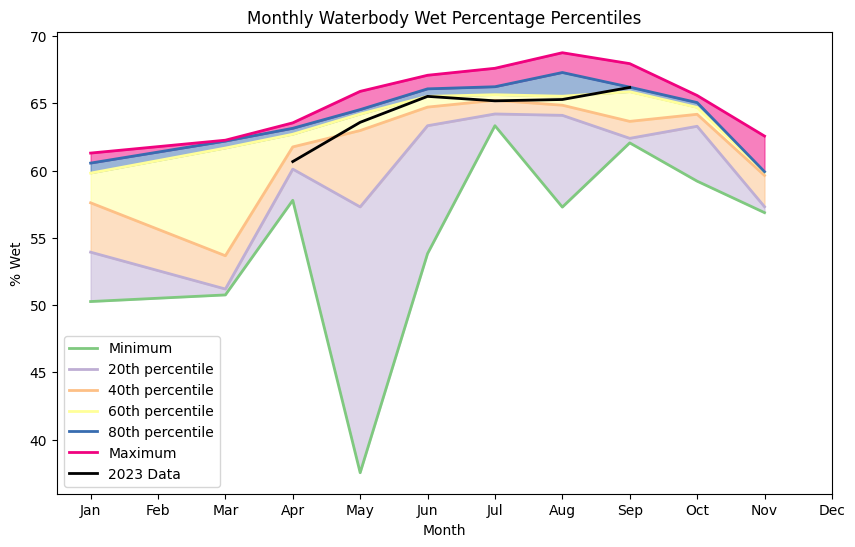

In [28]:
timeseries_raw = plot_timeseries(selected_waterbody_timeseries, "raw_values")
timeseries_raw

#### Plotting median values 

Plotting the `median` values on a monthly basis from a waterbody's timeseries allows us to observe a monthly central trend. Resulting in a simplified dataset, allowing for better identification of any present trends or patterns.

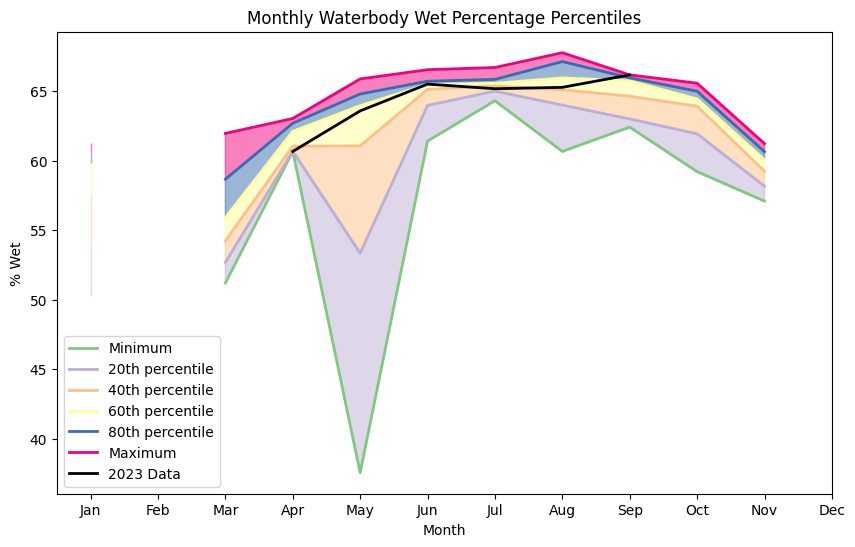

In [29]:
timeseries_median = plot_timeseries(selected_waterbody_timeseries, "median")
timeseries_median

#### Plotting rolling-median values
Plotting the `rolling_median` for a waterbody's timeseries allows us to observe the central tendency of the data while smoothing out short-term fluctuations of our data. Resulting in the reduction of noise and clearer identification of underlaying trends and patterns.

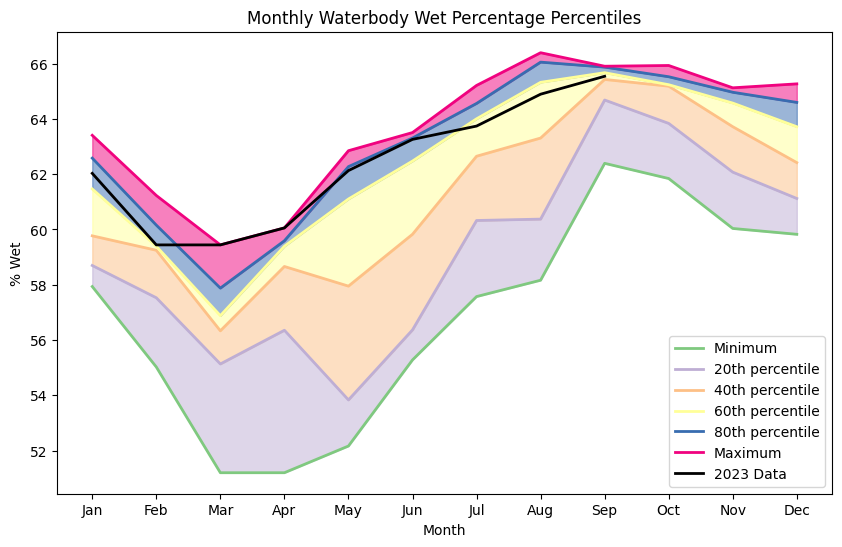

In [30]:
timeseries_rolling_median = plot_timeseries(
    selected_waterbody_timeseries, "rolling_median"
)
timeseries_rolling_median